Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
# instead of starting ipython with --pylab let's use explicit imports 
# and update the code as we go...
import matplotlib.pyplot as plt
%matplotlib inline

# not necessary, but adds nice plot formatting
import seaborn as sns

In [2]:
import nsfg
df = nsfg.ReadFemPreg()
df.head()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print value counts for <tt>birthord</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [3]:
df.birthord.value_counts().sort_index()

1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64

Print value counts for <tt>prglngth</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [4]:
# match the formatting of the nsfg book
# value	label	 	Total
# 0-13	13 WEEKS OR LESS	 	3522
# 14-26	14-26 WEEKS	 	793
# 27-50	27 WEEKS OR LONGER	 	9278
#  	Total	 	13593

# step through the pairs of min-max bounds per group
col = 'prglngth'

print "Duration of completed pregnancy in weeks"
print "-"*40

for mn, mx in zip([0,14,27], [13,26,50]):
    print "{}-{}: {}".format( 
        mn, 
        mx, 
        # filter df on the current pair, count the entries
        df[ (df[col] >= mn) & (df[col] <= mx) ][col].count() 
        )
    
# count up everything in the range    
print "Total: {}".format(
        df[ (df[col] >= 0) & (df[col] <= 50) ][col].count()
        )

Duration of completed pregnancy in weeks
----------------------------------------
0-13: 3522
14-26: 793
27-50: 9278
Total: 13593


Print value counts for <tt>agepreg</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611935).

Looking at this data, please remember my comments in the book about the obligation to approach data with consideration for the context and respect for the respondents.

In [5]:
# it appears that we don't have any of the non-numeric entries
df['agepreg'].describe()

count    13241.000000
mean        24.688151
std          5.814708
min         10.330000
25%         20.080000
50%         23.910000
75%         28.660000
max         44.080000
Name: agepreg, dtype: float64

In [6]:
# value	label	 	Total
# .	INAPPLICABLE	 	352
# 0-1999	UNDER 20 YEARS	 	3182
# 2000-2499	20-24 YEARS	 	4246
# 2500-2999	25-29 YEARS	 	3178
# 3000-4499	30-44 YEARS	 	2635
#  	Total	 	13593

col = 'agepreg'

print "Age at pregnancy outcome"
print "-"*24

for mn, mx in zip([0,20,25,30], [19,24,29,44]):
    print "{}-{}: {}".format( 
        mn, 
        mx, 
        # filter df on the current pair, count the entries
        df[ (df[col] >= mn) & (df[col] <= mx) ][col].count() 
        )
    
# count up everything in the range    
print "Total: {} (with 'inapplicable' count: {})".format(
        df[ (df[col] >= 0) & (df[col] <= 44) ][col].count(),
        df[ (df[col] >= 0) & (df[col] <= 44) ][col].count() + 352
        )  

# these seem to be close, but not quite in line with the codebook?

Age at pregnancy outcome
------------------------
0-19: 2391
20-24: 3528
25-29: 2697
30-44: 2634
Total: 13240 (with 'inapplicable' count: 13592)


Compute the mean birthweight.

In [7]:
df.totalwgt_lb.mean()

7.2656284576233681

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [8]:
# scale the new col by using the lb col
df['totalwgt_kb'] = df['totalwgt_lb']*0.453592

# calculate the kb mean
print "Total weight (kg), mean: {}".format(df['totalwgt_kb'].mean())

# inspect the two, together
df[['totalwgt_kb', 'totalwgt_lb']].head()

Total weight (kg), mean: 3.29563094335


,totalwgt_kb,totalwgt_lb
0,3.997279,8.8125
1,3.572037,7.8750
2,4.139027,9.1250
3,3.175144,7.0000
4,2.806601,6.1875


Look through the codebook and find a variable, other than the ones mentioned in the book, that you find interesting.  Compute values counts, means, or other statistics.

In [9]:
# let's look at the informal marital status at prenancy outcome

# value	label	 	Total
# .	INAPPLICABLE	 	352
# 1	MARRIED	 	6349
# 2	DIVORCED	 	533
# 3	WIDOWED	 	23
# 4	SEPARATED	 	182
# 5	COHABITING	 	2022
# 6	NEVER MARRIED, NOT COHABITING	 	4132
#  	Total	 	13593

print "* value counts:"
print df['rmarout6'].value_counts().sort_index()
print

print "* quartiles: "
print df['rmarout6'].describe()

* value counts:
1    6349
2     533
3      23
4     182
5    2022
6    4132
dtype: int64

* quartiles: 
count    13241.000000
mean         3.256098
std          2.307851
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max          6.000000
Name: rmarout6, dtype: float64


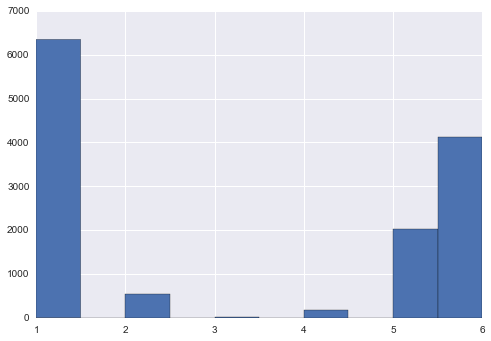

In [10]:
df['rmarout6'].hist()

Create a boolean Series.

In [11]:
df.outcome == 1

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
...
13578     True
13579     True
13580    False
13581     True
13582    False
13583    False
13584     True
13585    False
13586    False
13587    False
13588     True
13589    False
13590    False
13591     True
13592     True
Name: outcome, Length: 13593, dtype: bool

Use a boolean Series to select the records for the pregnancies that ended in live birth.

In [12]:
live = df[df.outcome == 1]
len(live)

9148

Count the number of live births with <tt>birthwgt_lb</tt> between 0 and 5 pounds (including both).  The result should be 1125.

In [13]:
len(live[(live.birthwgt_lb >= 0) & (live.birthwgt_lb <= 5)])

1125

Count the number of live births with <tt>birthwgt_lb</tt> between 9 and 95 pounds (including both).  The result should be 798 

In [14]:
len( live[(live.birthwgt_lb >= 9) & (live.birthwgt_lb <= 95)] )

798

Use <tt>birthord</tt> to select the records for first babies and others.  How many are there of each?

In [15]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

Compute the mean weight for first babies and others.

In [16]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [17]:
others.totalwgt_lb.mean()

7.3258556149732623

Compute the mean <tt>prglngth</tt> for first babies and others.  Compute the difference in means, expressed in hours.

In [18]:
# recall that prglngth is in weeks
print "Additional mean length (in hours) of pregnancy of first babies over non-first:" 
print"{}".format(
    (firsts['prglngth'].mean() - others['prglngth'].mean())*7*24
    )

Additional mean length (in hours) of pregnancy of first babies over non-first:
13.1102608186
